# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        response_city_weather_json = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_city_weather_json['coord']['lat']
        city_lng = response_city_weather_json['coord']['lon']
        city_max_temp = response_city_weather_json['main']['temp_max']
        city_humidity = response_city_weather_json['main']['humidity']
        city_clouds = response_city_weather_json['clouds']['all']
        city_wind = response_city_weather_json['wind']['speed']
        city_country = response_city_weather_json['sys']['country']
        city_date = response_city_weather_json['sys']['sunrise']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | ovalle
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | malabar
Processing Record 6 of Set 1 | kapuskasing
Processing Record 7 of Set 1 | la'ie
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | mana
Processing Record 10 of Set 1 | kathu
Processing Record 11 of Set 1 | abdulino
Processing Record 12 of Set 1 | wakema
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | pacasmayo
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | waddan
Processing Record 17 of Set 1 | cascais
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | island harbour
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | papatowai
Processing Record 23 of Set 1 | 

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,8.43,79,96,20.62,SH,1728626977
1,olonkinbyen,70.9221,-8.7187,-3.14,92,100,20.41,SJ,1728632162
2,ovalle,-30.5983,-71.2003,12.29,93,16,0.91,CL,1728641404
3,waitangi,-43.9535,-176.5597,10.46,72,51,1.34,NZ,1728665956
4,malabar,-33.9667,151.2500,24.36,66,75,5.66,AU,1728587910


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,8.43,79,96,20.62,SH,1728626977
1,olonkinbyen,70.9221,-8.7187,-3.14,92,100,20.41,SJ,1728632162
2,ovalle,-30.5983,-71.2003,12.29,93,16,0.91,CL,1728641404
3,waitangi,-43.9535,-176.5597,10.46,72,51,1.34,NZ,1728665956
4,malabar,-33.9667,151.2500,24.36,66,75,5.66,AU,1728587910


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

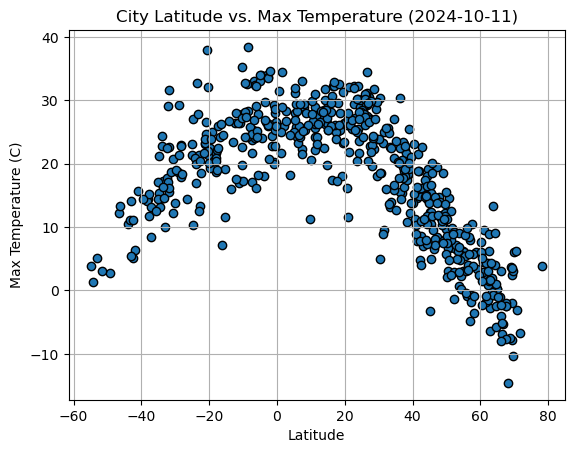

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-10-11)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig_new_1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

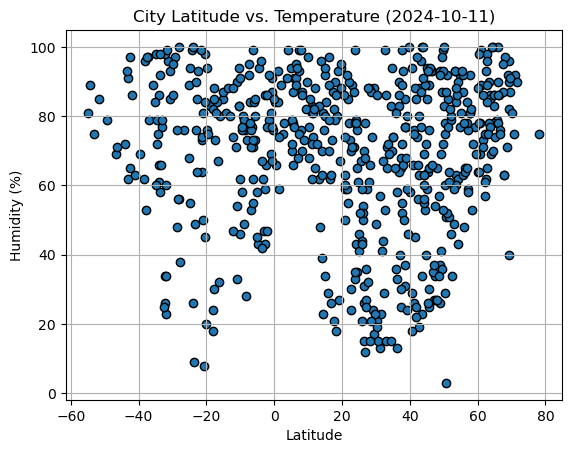

In [42]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2024-10-11)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig_NEW_2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

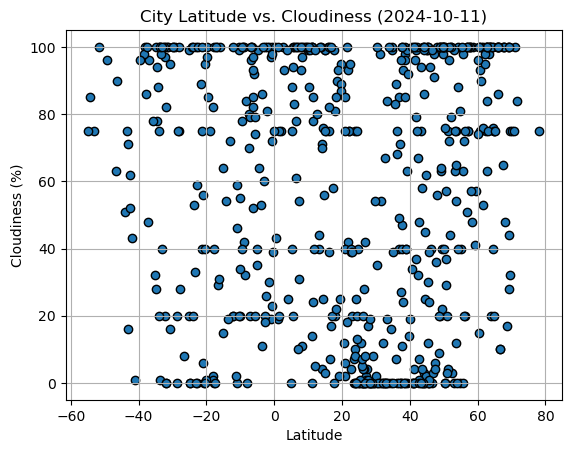

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-10-11)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig_NEW_3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

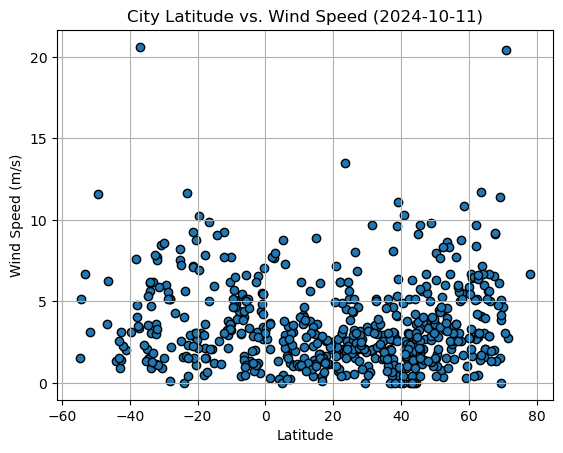

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-10-11)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig_NEW_4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
x_values_lat = city_data_df['Lat']
y_values_max_temp = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_max_temp)

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,-3.14,92,100,20.41,SJ,1728632162
5,kapuskasing,49.4169,-82.4331,8.00,87,40,3.09,CA,1728647113
6,la'ie,21.6477,-157.9253,26.66,85,42,1.79,US,1728577552
8,mana,5.6592,-53.7767,25.78,87,100,2.93,GF,1728638465
9,kathu,7.9178,98.3332,28.90,76,93,2.15,TH,1728602029


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,8.43,79,96,20.62,SH,1728626977
2,ovalle,-30.5983,-71.2003,12.29,93,16,0.91,CL,1728641404
3,waitangi,-43.9535,-176.5597,10.46,72,51,1.34,NZ,1728665956
4,malabar,-33.9667,151.2500,24.36,66,75,5.66,AU,1728587910
7,punta arenas,-53.1500,-70.9167,5.06,75,75,6.69,CL,1728639919


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7638928416569556


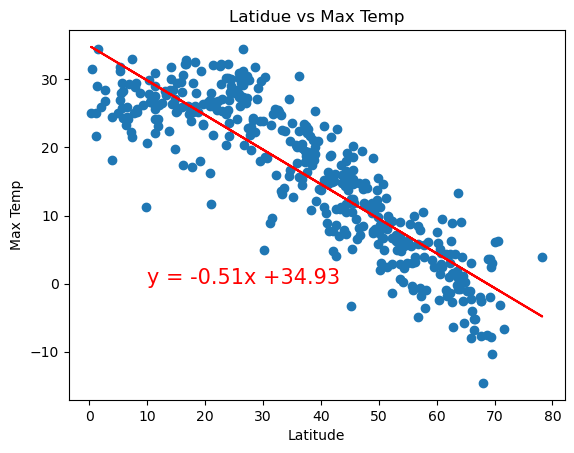

In [70]:
# Linear regression on Northern Hemisphere
x_values_nlat = northern_hemi_df['Lat']
y_values_ntemp = northern_hemi_df['Max Temp']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values_nlat, y_values_ntemp)
regress_values = x_values_nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values_nlat, y_values_ntemp)
plt.plot(x_values_nlat, regress_values, "r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latidue vs Max Temp')
r_value_n = r_value**2
print(f'The r^2-value is: {r_value_n}')
plt.show()


The r^2-value is: 0.5052357842422645


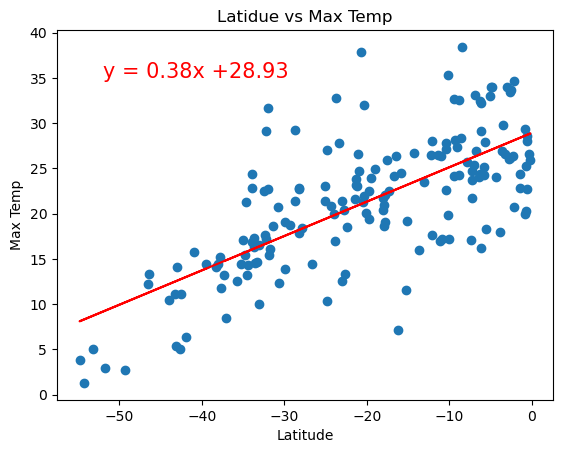

In [52]:
# Linear regression on Southern Hemisphere
x_values_slat = southern_hemi_df['Lat']
y_values_stemp = southern_hemi_df['Max Temp']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values_slat, y_values_stemp)
regress_values = x_values_slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values_slat, y_values_stemp)
plt.plot(x_values_slat, regress_values, "r-")
plt.annotate(line_eq,(-52,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latidue vs Max Temp')
r_value_s = r_value**2
print(f'The r^2-value is: {r_value_s}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# In the Northern Hemisphere, 
# the r^2 of 0.76 shows a strong connection between latitude and the temperature variable, 
# In the Southern Hemisphere, 
# the r^2-value of 0.51 suggests a weaker relationship, 
# with more variation and less predictability. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.004967134290702758


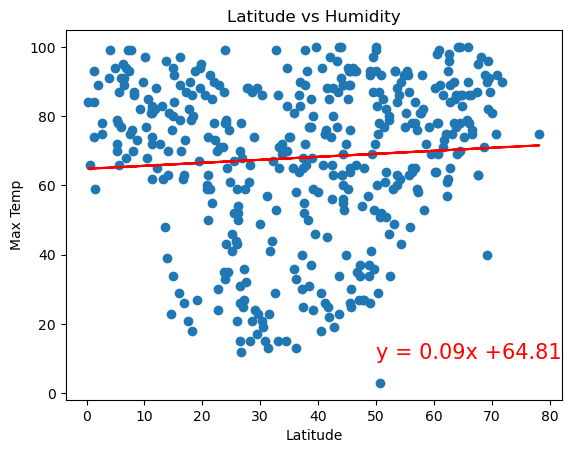

In [71]:
# Northern Hemisphere
x_values_nlat = northern_hemi_df['Lat']
y_values_nHumi = northern_hemi_df['Humidity']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values_nlat, y_values_nHumi)
regress_values = x_values_nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values_nlat, y_values_nHumi)
plt.plot(x_values_nlat, regress_values, "r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Humidity')
r_value_n = r_value**2
print(f'The r^2-value is: {r_value_n}')
plt.show()

The r^2-value is: 0.004340319923214436


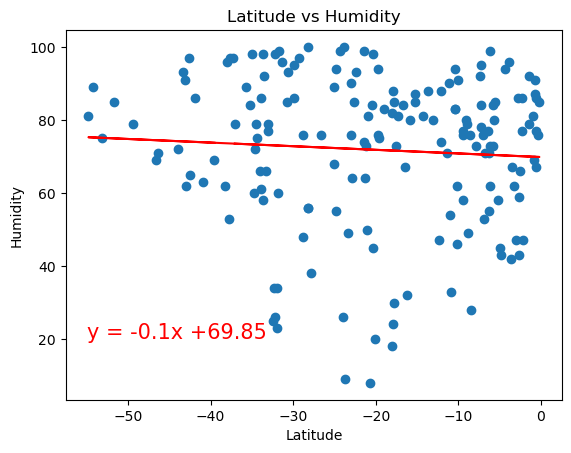

In [72]:
# Southern Hemisphere
x_values_slat = southern_hemi_df['Lat']
y_values_sHumi = southern_hemi_df['Humidity']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values_slat, y_values_sHumi)
regress_values = x_values_slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values_slat, y_values_sHumi)
plt.plot(x_values_slat, regress_values, "r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
r_value_s = r_value**2
print(f'The r^2-value is: {r_value_s}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Both of the r^2-value of northern and southern are very low.
# meaning there is no meaningful linear relationship between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.020296492973773138


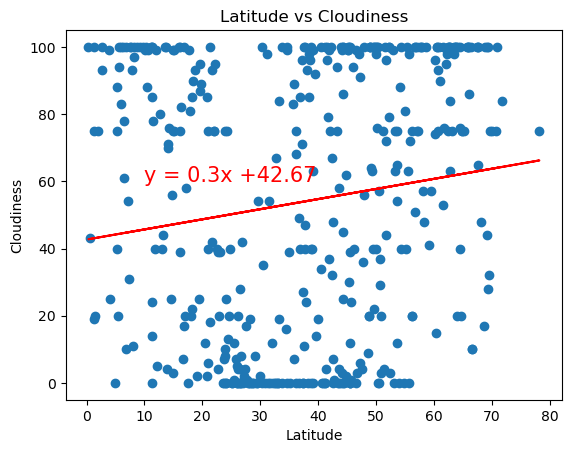

In [73]:
# Northern Hemisphere
x_values_nlat = northern_hemi_df['Lat']
y_values_nCloud = northern_hemi_df['Cloudiness']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values_nlat, y_values_nCloud)
regress_values = x_values_nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values_nlat, y_values_nCloud)
plt.plot(x_values_nlat, regress_values, "r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
r_value_n = r_value**2
print(f'The r^2-value is: {r_value_n}')
plt.show()

The r^2-value is: 0.004955231181395108


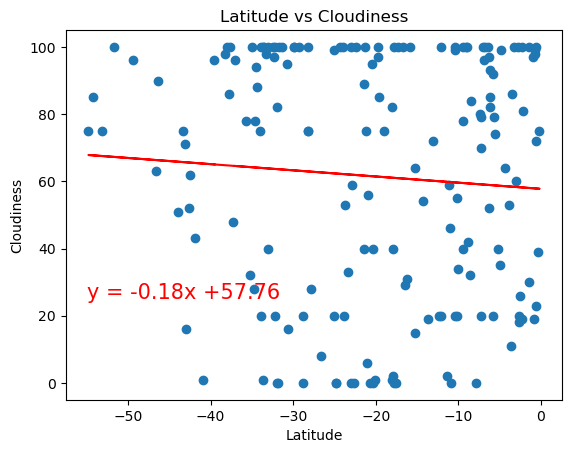

In [74]:
# Southern Hemisphere
x_values_slat = southern_hemi_df['Lat']
y_values_sCloud = southern_hemi_df['Cloudiness']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values_slat, y_values_sCloud)
regress_values = x_values_slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values_slat, y_values_sCloud)
plt.plot(x_values_slat, regress_values, "r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
r_value_s = r_value**2
print(f'The r^2-value is: {r_value_s}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Both of the r^2-value of northern and southern are very low.
# meaning there is no meaningful linear relationship between latitude and Cloudiness
# less variance

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.060907073538911095


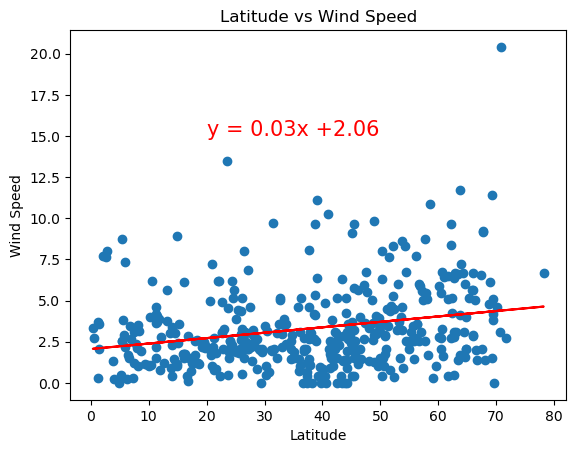

In [75]:
# Northern Hemisphere
x_values_nlat = northern_hemi_df['Lat']
y_values_nWind = northern_hemi_df['Wind Speed']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values_nlat, y_values_nWind)
regress_values = x_values_nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values_nlat, y_values_nWind)
plt.plot(x_values_nlat, regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
r_value_n = r_value**2
print(f'The r^2-value is: {r_value_n}')
plt.show()

The r^2-value is: 0.005590116918206576


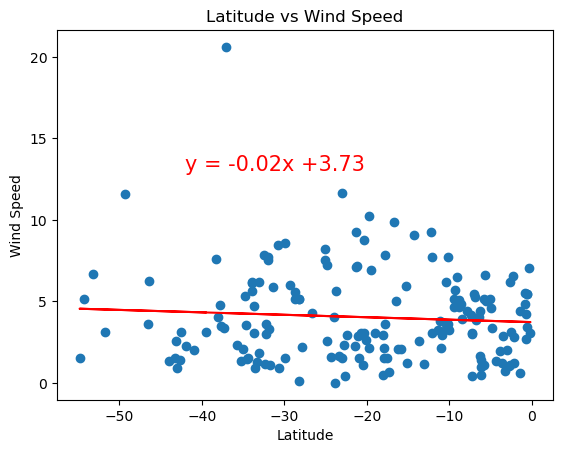

In [76]:
# Southern Hemisphere
x_values_slat = southern_hemi_df['Lat']
y_values_sWind = southern_hemi_df['Wind Speed']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values_slat, y_values_sWind)
regress_values = x_values_slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values_slat, y_values_sWind)
plt.plot(x_values_slat, regress_values, "r-")
plt.annotate(line_eq,(-42,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
r_value_s = r_value**2
print(f'The r^2-value is: {r_value_s}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [77]:
# In northern Hemisphere, the r^2-value shows a weak linear relationship 
# however, in southern Hemisphere, the r^2-value shows almost no linear relationship